
 
 Важной характеристикой матрицы, а также линейного преобразования, заданного этой матрицей, является
спектр — набор собственных векторов и соответствующих собственных значений.
Собственным вектором линейного преобразования $A$ называется такой ненулевой вектор  $x\in V$ , что для
некоторого $\lambda\in R$ выполняется $A x\in \lambda x$

#### Методы оптимизации
* **Метод имитации отжига** <br>
функция anneal (англ. отжиг) в модуле optimize
библиотеки SciPy.
* **Метод Нелдера-Мида**, он же симплекс метод
<br>Метод Нелдера-Мида является методом
оптимизации по умолчанию в функции SciPy.optimize.minimize

Градиентный спуск , выбираем шаг = $\epsilon /k$ (евристика)
Стохастический градиентный спуск - на каждом шаге вычислияем антиградиент не по всей выборке , а по случайному подмножеству.<br>
Сокращенное наименование:**SGD**<br>
преимущества: 
* быстрее выполняется шаг
* не требует хранения всей выборки в памяти
* онлайн обучение

### Линейная регрессия

$$ Q (w,x)=\frac{1}{l}\sum_{l=1}^{l} (\langle w{,}x \rangle-y_i)^2 \to min_w     $$,где Q- функционал ошибки(качеста) модели

функционал качества классификации (-1,1)
* логистисическая
* пороговая
* экспоненциальная
* кусочно линейная

##### Регуляризация
нужна для:
* борьба со сложностью модели
* борьба с линейностью признаков
Симптомом переобучения являются большие веса при коээфициентах
Для этого добавляем регуляризатор.
$$ ||w||_2 =\sum_{j=1}^{d} w_{j}^2 $$
$Q(w,X)+ \lambda ||w||^2 \to min _w  $
* чем больше $\lambda$, тем ниже сложность модели
* чем меньше $\lambda$, тем выше риск переобучения
* выбор $\lambda$ по кросс валидации

$$ ||w||_2 =\sum_{j=1}^{d} w_{j}^2  -L_2 регуляризатор$$  **ridge**
$$ ||w||_1 =\sum_{j=1}^{d} |w_{j}| -L_1 регуляризатор $$  **lasso**

$L_1$-регуляризатор:
* Негладкий
* Некоторые веса оказываются нулевыми
* Позволяет отбирать признаки

### Оценка качества алгоритмов
* отложенная выборка
* кросс валидация
<br>
**Перемешивайте выборку!**(только если не строим модели, зависящие от предыдущего периода)<br>
При сравнении многих моделей выбираем контрольную выборку(для проверки на адекватность)

### Метрики качества в задачах регрессии
* MSE - среднеквадратичная ошибка
<br> подстраивается под выбросы(что плохо)
* MAE -считается модуль отклонения, а не квадрат <br>штраф за выборсы ниже
* коэффициент детерминации $$ R^2(a,X)=1-\frac{\sum_{i=1}^{l} (a(x_i)-y_i)^2}{\sum_{i=1}^{l} (y_i-\bar{y})^2}  $$
$$ \bar{y}=\frac{1}{l}\sum_{i=1}^{l} y_i $$
Показывает долю дисперсии, объясненной общей моделью
* $0 \leq R^2 \leq 1$ для разумных моделей
* $ R^2 =1$ идеальная модель
* $ R^2 =0$ модель на уровне константной
* $ R^2 < 0$ модель хуже константной

## Метрики качества в задачах классификации
* **доля правильных ответов(accuracy)**:<br> $$accuracy(a,X)=\frac{1}{l}\sum_{i=1}^{l} [a(x_i)=y_i]$$<br>проблема- несбаллансированные выборки<br> Для этого введем $q_0$ -доля объектов самого крупного класса выборки<br>
и для разумных алгоритмов $accuracy \in [q_0,1]$
##### Матрица ошибок


|   |  y=1 | y=-1  |  
|---|---|---|---|---|
| a(x)=1  | True Positive(TP)  | False Positive(FP)  |  
|a(x)=-1   | False Negative (FN)  | True Negative (TN)  |



* **точность** (насколько верно алгоритм относит объекты к первому классу) $$precision(a,X)=\frac{TP}{TP+FP}$$
* **Полнота** $$recall(a,X)=\frac{TP}{TP+FN}$$
* **F мера - объедиение точности и полноты** $$F=\frac{2*precison*recall}{precison+recall}$$ <br>**расширенная версия F меры**
$$F_\beta=(1+\beta^2)*\frac{precision+recall}{\beta^2*precision+recall}$$ <br> если $\beta=0.5 $ получим важнее полнота,если $\beta=2 $ то важнее точность

### Качество оценок классификатора

* **PR -кривая **<br>Ось X - полнота<br>Ось Y - точность<br>точки-классификаторы при определённых порогах

<br> Левая точка (0,0) <br> Правая точка (1,r),где **r** -доля положительных объектов <br>Для идеального классификатора проходит через (1,1)<br> **AUC-PRC** -площадь под PR-кривой
* **POC -кривая **<br>Ось X - FalsePositiveRate$$FPR=\frac{FP}{FP+TN}$$<br>Ось Y - TruePositiveRate $$TPR=\frac{TP}{TP+FN}$$<br>
**AUC-ROC** -площадь под ROC-кривой
Площадь под ROC кривой **не зависит** от баланса классов <br>**AUC-PRG** -выразительнее в случае дисбаланса классов

### Cross Validation

In [51]:
from sklearn import model_selection, datasets,linear_model, metrics#,cross_validation
import numpy as np
import pandas as pd

### Разовое разбиение данных на обучение и тест с помощью train_test_split

In [15]:
iris=datasets.load_iris()
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris.data, iris.target, 
                                                                                     test_size = 0.3)

#### KFold
возвращает индексы, а не данные

In [35]:
X=np.array(range(10))
target = np.array([0] * 5 + [1] * 5)
pd.DataFrame(list(zip(X,target)),columns=['X','y'])

,X,y
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


In [28]:

for train_indices, test_indices in model_selection.KFold( n_splits = 5, shuffle = True, random_state = 1).split(X):
    print( train_indices, test_indices)

[0 1 3 4 5 6 7 8] [2 9]
[0 1 2 3 5 7 8 9] [4 6]
[1 2 4 5 6 7 8 9] [0 3]
[0 2 3 4 5 6 8 9] [1 7]
[0 1 2 3 4 6 7 9] [5 8]


#### StratifiedKFold

In [36]:
# target- метки классов
target = np.array([0] * 5 + [1] * 5)
for train_indices, test_indices in model_selection.StratifiedKFold(n_splits=5, shuffle = True, random_state = 0).split(X,target):
    print (train_indices, test_indices)

[0 1 3 4 6 7 8 9] [2 5]
[1 2 3 4 5 6 8 9] [0 7]
[0 2 3 4 5 7 8 9] [1 6]
[0 1 2 4 5 6 7 8] [3 9]
[0 1 2 3 5 6 7 9] [4 8]


#### ShuffleSplit

In [37]:
for train_indices, test_indices in model_selection.ShuffleSplit( n_splits = 10, test_size = 0.2).split(X):
    print (train_indices, test_indices)

[2 3 4 9 7 1 8 0] [6 5]
[3 5 4 2 0 8 9 1] [6 7]
[9 4 3 1 5 7 2 0] [6 8]
[9 0 1 5 2 4 6 3] [7 8]
[4 3 2 9 7 6 1 5] [8 0]
[1 2 9 3 6 0 5 4] [7 8]
[6 1 2 4 5 8 7 9] [3 0]
[4 9 0 3 1 6 7 8] [5 2]
[0 3 6 9 4 1 5 2] [8 7]
[7 0 8 9 5 4 2 3] [1 6]


#### StratifiedShuffleSplit

In [38]:
for train_indices, test_indices in model_selection.StratifiedShuffleSplit(n_splits = 4, test_size = 0.2).split(X,target):
    print (train_indices, test_indices)

[7 8 2 4 6 1 3 5] [9 0]
[3 5 6 1 8 4 2 7] [9 0]
[4 3 9 6 7 0 2 8] [1 5]
[3 2 7 4 6 0 9 8] [1 5]


#### Leave-One-Out

In [42]:
for train_indices, test_index in model_selection.LeaveOneOut().split(X):
    print (train_indices, test_index)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [117]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 5.5, random_state=1)
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

# Задачи классификации

#### RidgeClassifier

In [118]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [119]:
#оценка качества классификации
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [60]:
print(ridge_classifier.coef_)
print(ridge_classifier.intercept_ )

[[-0.0854443  -0.07273219]]
[-0.31250723]


In [59]:
ridge_classifier.intercept_ 

array([-0.31250723])

#### LogisticRegression

In [64]:
log_regressor = linear_model.LogisticRegression(random_state = 1)
log_regressor.fit(train_data, train_labels)
lr_predictions = log_regressor.predict(test_data)
# выводим вероятности принадлежности к классам
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [65]:
print (metrics.accuracy_score(test_labels, lr_predictions))
print (metrics.accuracy_score(test_labels, ridge_predictions))

0.8
0.866666666667


### Оценка качества по cross-validation
#### cross_val_score

In [67]:
#For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)
print(ridge_scoring)
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)
print(lr_scoring)

[ 0.8  0.9  0.9  0.9  1.   1.   0.7  0.9  0.9  0.8]
[ 0.7  0.9  0.9  0.9  1.   1.   0.7  0.9  0.9  0.8]


In [69]:
print ('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))
print ('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Ridge mean:0.8800000000000001, max:1.0, min:0.7, std:0.08717797887081348
Log mean:0.8700000000000001, max:1.0, min:0.7, std:0.10049875621120892


#### cross_val_score с заданными scorer и cv_strategy

In [87]:
scorer = metrics.make_scorer(metrics.accuracy_score)
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits = 4, test_size = 0.2)
cv_strategy = model_selection.LeaveOneOut()
ridge_scoring =model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)
print ('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std()))
print ('Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std()))

Ridge mean:0.87, max:1.0, min:0.0, std:0.33630343441600474
Log mean:0.87, max:1.0, min:0.0, std:0.33630343441600474


## Метрики качества в задачах классификации

#### accuracy

In [120]:
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

####  confusion matrix

In [122]:
metrics.confusion_matrix(test_labels, ridge_predictions)

array([[14,  4],
       [ 0, 12]])

#### precision 

In [129]:
metrics.precision_score(test_labels, ridge_predictions, pos_label = 1),metrics.precision_score(test_labels, ridge_predictions, pos_label = 0)

(0.75, 1.0)

#### recall

In [130]:
metrics.recall_score(test_labels, ridge_predictions, pos_label = 1),metrics.recall_score(test_labels, ridge_predictions, pos_label = 0)

(1.0, 0.77777777777777779)

#### f1

In [131]:
metrics.f1_score(test_labels, ridge_predictions, pos_label = 0),metrics.f1_score(test_labels, ridge_predictions, pos_label = 1)

(0.87500000000000011, 0.8571428571428571)

#### classification report

In [133]:
print( metrics.classification_report(test_labels, ridge_predictions))

             precision    recall  f1-score   support

          0       1.00      0.78      0.88        18
          1       0.75      1.00      0.86        12

avg / total       0.90      0.87      0.87        30



#### ROC curve

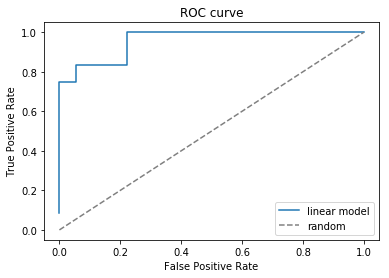

In [135]:
fpr, tpr, _ = metrics.roc_curve(test_labels, lr_proba_predictions[:,1])
pylab.plot(fpr, tpr, label = 'linear model')
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")

#### ROC AUC

In [136]:
print(metrics.roc_auc_score(test_labels, ridge_predictions))
print(metrics.roc_auc_score(test_labels, lr_proba_predictions[:,1]))

0.888888888889
0.958333333333


#### PR AUC

In [137]:
metrics.average_precision_score(test_labels, ridge_predictions)

0.875

#### log_loss
чем меньше метрика, тем лучше

In [138]:
metrics.log_loss(test_labels, lr_proba_predictions[:,1])

0.35185364928848134

# Задачи регрессии

In [89]:
from matplotlib.colors import ListedColormap
from sklearn import linear_model
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Генерация данных

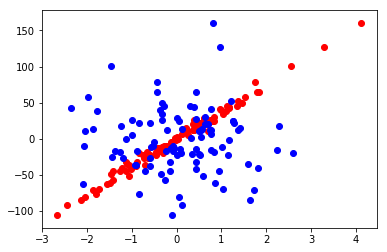

In [91]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)
pylab.scatter(list(map(lambda x:x[0], data)), target, color = 'r')
pylab.scatter(list(map(lambda x:x[1], data)), target, color = 'b')

In [92]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [106]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)
print (test_labels)
print (predictions)
print(metrics.mean_absolute_error(test_labels, predictions))

[  51.87072011   12.47089016   45.05465366  -21.47606913   78.24817537
   64.19559505  -17.27897399  -10.06708677  -22.33224966   39.70663436
   27.83791274   10.33267887   44.41658249  -37.31870104  -80.80239408
  -16.85466265  -35.32062686  -52.37232463 -105.77758163   49.41686419
   44.66274342  160.09441244   13.02656201  -16.79027112  101.14760598
   25.24428409  -40.84204295  -26.87743177  -21.48288019  -10.29545833]
[  51.17558294   19.25461127   41.33163293  -18.04167812   64.80103454
   68.59084688  -13.57252948   -9.94951967  -28.9200411    36.86950436
   22.39816651    8.5206187    43.17304133  -34.91822967  -77.6322503
  -16.36721068  -41.67846515  -40.54356654 -101.01325118   54.49990235
   49.70940828  154.40589974   18.07990755  -14.91350598   94.97973962
   14.12530586  -46.23823266  -28.01747988  -24.50433799  -11.29452347]
4.46079563358


In [107]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779697, std: 1.0737104492890193


In [108]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779697, std: 1.0737104492890193


In [111]:
print(linear_regressor.coef_)
print(linear_regressor.intercept_)
print ("y = {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.coef_[0], linear_regressor.coef_[1]))

[ 37.69832982   0.29750861]
-0.729240473407
y = 37.70*x1 + 0.30*x2


#### Lasso

In [113]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print ('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))
print ("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

mean: 4.154478246666397, std: 1.0170354384993354
y = 36.65*x1 + 0.00*x2


#### mean absolute error

In [140]:
metrics.mean_absolute_error(test_labels, lasso_predictions)

40.531653379453374

#### mean squared error

In [142]:
metrics.mean_squared_error(test_labels, lasso_predictions)

2602.6983633283935

#### root mean squared error

In [143]:
sqrt(metrics.mean_squared_error(test_labels, lasso_predictions))

51.0166479036833

#### r2 score

In [144]:
metrics.r2_score(test_labels, lasso_predictions)

-10843.576513868302

### Линейные модели рекомендации
* масштабирование признаков <br>
вычисляем среднее значение и стандартное отклонение <br>
$$\mu_j=\frac{1}{l}\sum_{i=1}^{l} x_i^j $$ $$\sigma_j=\sqrt{\sum_{i=1}^{l}( x_i^j-\mu_j)^2}$$
**Стандартизация(нормализация)**$$x_i^j:=\frac{ x_i^j-\mu_j}{\sigma_j}$$ **масштабирование на отрезок [0,1]**$$m_j=min(x_1^j,...,x_l^j)$$$$M_j=max(x_1^j,...,x_l^j)$$$$x_i^j:=\frac{ x_i^j-m_j}{M_j-m_j}$$

### Использование спрямляющих пространств
к примеру: если модель плохо описывает данные , можно попробовать добавть полиномы высого порядка(при степени равной 2 -добавляем новые признаки , равные квадратам исходных+ попарные произведения <br>**логарифмирование**$$x_i \to ln(x_i+1)$$$$x_i \to ln(|x_i|+1)$$

### Категориальные признаки
используем бинарное кодирование(если признак принимает n значений, добавляем n признаков и кодируем каждое значение вектором из 0 и 1
### Несбаллансированные выборки
*undersampling( выкидываем часть объектов)
*oversampling( дополням часть объектов)

*стратификация

In [28]:
from sklearn import  datasets, grid_search, linear_model, metrics,model_selection
import numpy as np
import pandas as pd
from sklearn import cross_validation

In [8]:
iris = datasets.load_iris()
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris.data, iris.target, 
                                                                                     test_size = 0.3,random_state = 0)
#создаем модель
classifier = linear_model.SGDClassifier(random_state = 0)

### Генерация сетки

In [9]:
classifier.get_params().keys()

dict_keys(['alpha', 'average', 'class_weight', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'n_iter', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'verbose', 'warm_start'])

In [20]:
#задаем параметры для перебора
parameters_grid = {
    'loss' : ['hinge', 'log', 'squared_hinge', 'squared_loss'],
    'penalty' : ['l1', 'l2'],
    'n_iter' : list(range(5,10)),
    'alpha' : np.linspace(0.0001, 0.001, num = 5),
}
#cv =model_selection.StratifiedShuffleSplit(n_splits =10, test_size = 0.2).split(train_data, train_labels)
cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 10, test_size = 0.2, random_state = 0)

### Подбор параметров и оценка качества
#### Grid search

In [24]:
grid_cv = grid_search.GridSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = cv)

In [25]:
%%time
grid_cv.fit(train_data, train_labels)

Wall time: 16.5 s


GridSearchCV(cv=StratifiedShuffleSplit(labels=[1 2 ..., 2 0], n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge', 'log', 'squared_hinge', 'squared_loss'], 'penalty': ['l1', 'l2'], 'n_iter': [5, 6, 7, 8, 9], 'alpha': array([ 0.0001 ,  0.00032,  0.00055,  0.00078,  0.001  ])},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [29]:
grid_cv.best_estimator_

SGDClassifier(alpha=0.00032499999999999999, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=9, n_jobs=1,
       penalty='l1', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)

In [30]:
print (grid_cv.best_score_)
print (grid_cv.best_params_)

0.8952380952380953
{'alpha': 0.00032499999999999999, 'loss': 'hinge', 'n_iter': 9, 'penalty': 'l1'}


#### Randomized grid search

In [31]:
%%time
randomized_grid_cv = grid_search.RandomizedSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = cv, n_iter = 20, 
                                                   random_state = 0)
randomized_grid_cv.fit(train_data, train_labels)

Wall time: 2.62 s


In [32]:
print (randomized_grid_cv.best_score_)
print (randomized_grid_cv.best_params_)

0.8142857142857143
{'penalty': 'l1', 'n_iter': 9, 'loss': 'log', 'alpha': 0.00055000000000000003}


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
#создаем стандартный scaler
scaler = StandardScaler()
scaler.fit(train_data, train_labels)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

### Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
#создаем pipeline из двух шагов: scaling и классификация
pipeline = Pipeline(steps = [('scaling', scaler), ('regression', regressor)])
pipeline.fit(train_data, train_labels)
metrics.mean_absolute_error(test_labels, pipeline.predict(test_data))

### Pipeline Подбор параметров

In [ ]:
pipeline.get_params().keys()

In [ ]:
parameters_grid = {
    'regression__loss' : ['huber', 'epsilon_insensitive', 'squared_loss', ],
    'regression__n_iter' : [3, 5, 10, 50], 
    'regression__penalty' : ['l1', 'l2', 'none'],
    'regression__alpha' : [0.0001, 0.01],
    'scaling__with_mean' : [0., 0.5],
}
grid_cv = grid_search.GridSearchCV(pipeline, parameters_grid, scoring = 'mean_absolute_error', cv = 4)

In [ ]:
# ести нужно разделять признаки:
estimator = pipeline.Pipeline(steps = [       
    ('feature_processing', pipeline.FeatureUnion(transformer_list = [        
            #binary
            ('binary_variables_processing', preprocessing.FunctionTransformer(lambda data: data[:, binary_data_indices])), 
                    
            #numeric
            ('numeric_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, numeric_data_indices])),
                ('scaling', preprocessing.StandardScaler(with_mean = 0))            
                        ])),
        
            #categorical
            ('categorical_variables_processing', pipeline.Pipeline(steps = [
                ('selecting', preprocessing.FunctionTransformer(lambda data: data[:, categorical_data_indices])),
                ('hot_encoding', preprocessing.OneHotEncoder(handle_unknown = 'ignore'))            
                        ])),
        ])),
    ('model_fitting', regressor)
    ]
)

# Решающие деревья

In [3]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, metrics, tree ,cross_validation
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


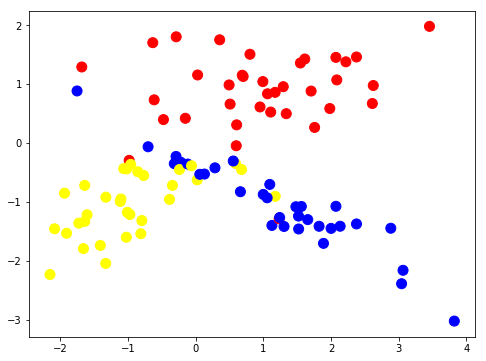

In [5]:
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)

In [6]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

### Модель DecisionTreeClassifier

In [7]:
clf = tree.DecisionTreeClassifier(random_state=1)
clf.fit(train_data, train_labels)
predictions = clf.predict(test_data)
metrics.accuracy_score(test_labels, predictions)
predictions

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 0, 2,
       0, 0, 0, 2, 1, 2, 0])

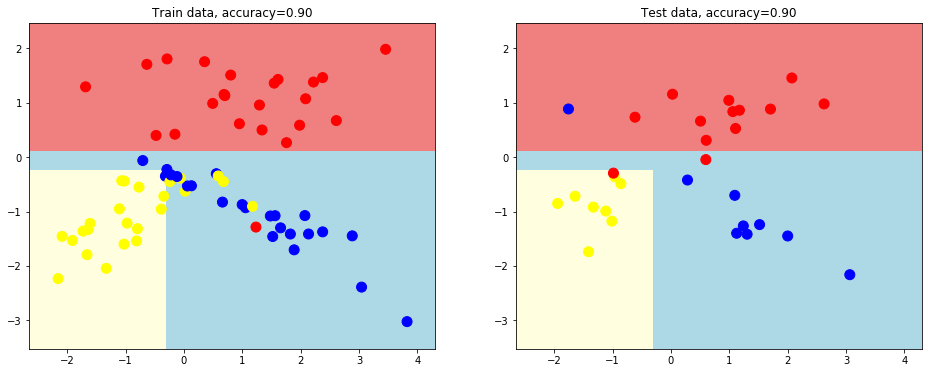

In [10]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))
    
plot_decision_surface(tree.DecisionTreeClassifier(random_state = 1, max_depth = 3),
                      train_data, train_labels, test_data, test_labels)

# Случайные леса

гиперпараметр q определяет размер подвыборки признаков, по которым строятся деревья <br>рекомендации:
* **для регрессии** $q=\frac{d}{3}$
* **для классификации** $q=\sqrt{d}$ <br>где d-число признаков

In [ ]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

# KNN

* подбор k:  с ростом k качество растет, потом начинает ухудшаться